# Titanic Dataset EDA and ML prediction using Random Forest, XGBoost and Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from xgboost import XGBClassifier
import lightgbm as ligb

In [2]:
# Basic config
my_font = dict(
            family="Courier New, monospace",
            size=18,
            color="Black",
            variant="small-caps",
) 

In [3]:
train = pd.read_csv('data/train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Checking the amount of null values

In [5]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### General description of the dataset

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data type of each column

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


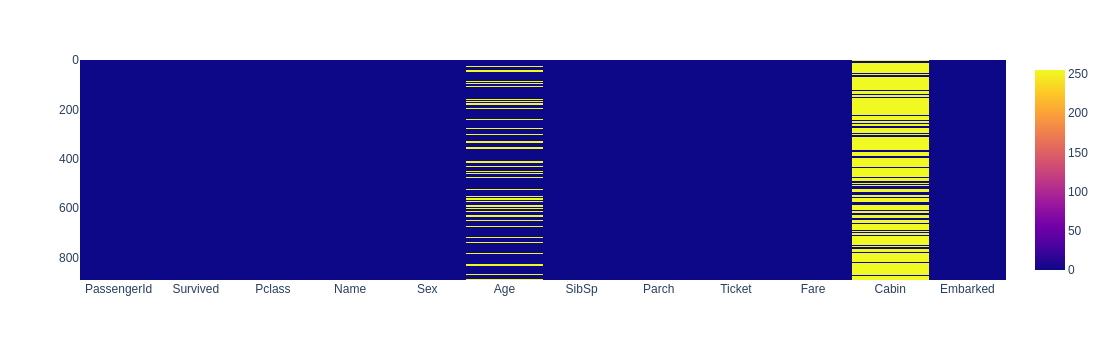

In [8]:
# Showing null values
fig = px.imshow(train.isnull())
fig.show()

### We note there are a lot of cabin missing values. 
- We are going to treat it as known and unknown.
- Age we are simply going to input it with the mean age

In [9]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


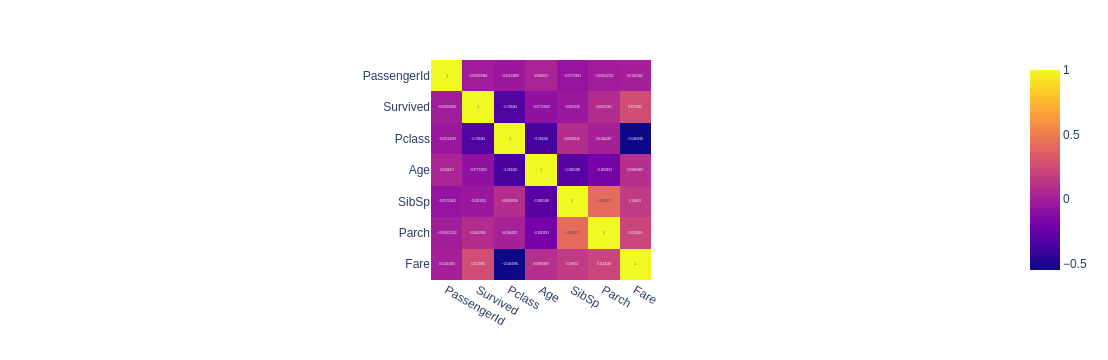

In [10]:
## Correlation matrix 
fig = px.imshow(train.corr(numeric_only=True), text_auto=True)
fig.show()

## Dropping useless columns like name, ticket, id

In [11]:
train.drop(columns={"PassengerId", "Ticket"}, inplace=True)

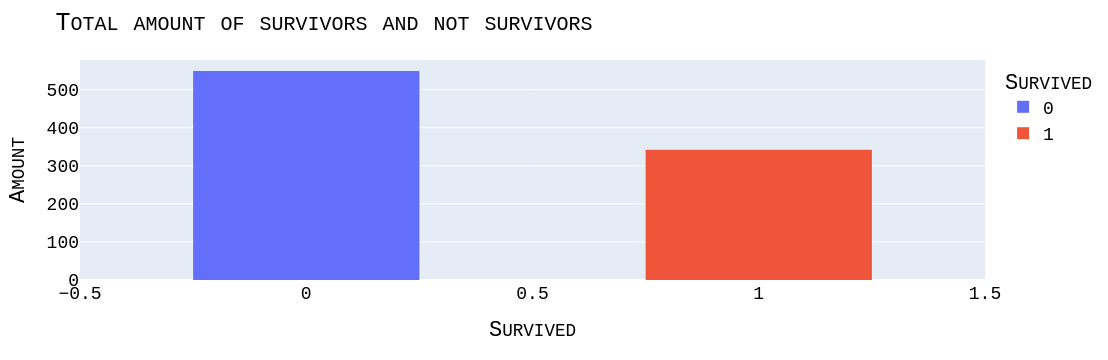

In [12]:
survivors = train.groupby('Survived').size().reset_index(name='Amount')
fig = px.histogram(survivors, x='Survived', y='Amount', color='Survived')
fig.update_layout(
    title = {
        'text': f"Total amount of survivors and not survivors"
    },
    bargap=0.5,
    yaxis_title='Amount',
   font = my_font
)

fig.show()


## Analysing Sex

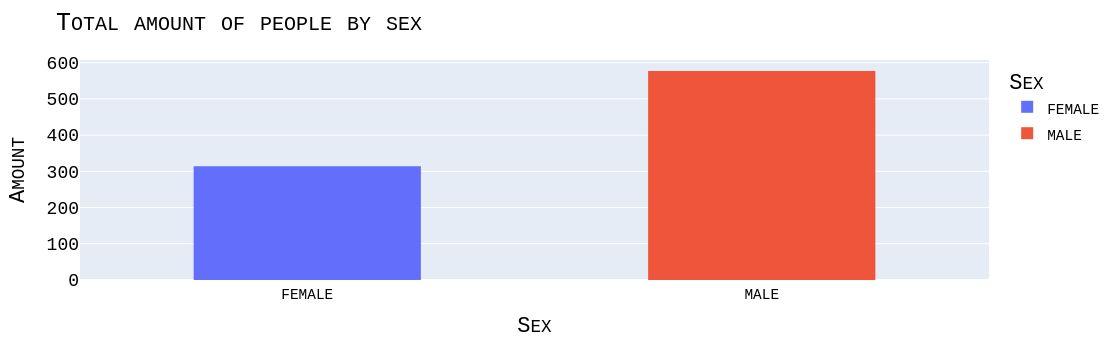

In [13]:
# total amount of people by sex

total_amount_by_sex = train.groupby('Sex').size().reset_index(name='Amount')

fig = px.histogram(total_amount_by_sex, x='Sex', y='Amount', color='Sex')
fig.update_layout(
    title = {
        'text': f"Total amount of people by sex"
    },
    bargap=0.5,
    yaxis_title='Amount',
    font=my_font
)

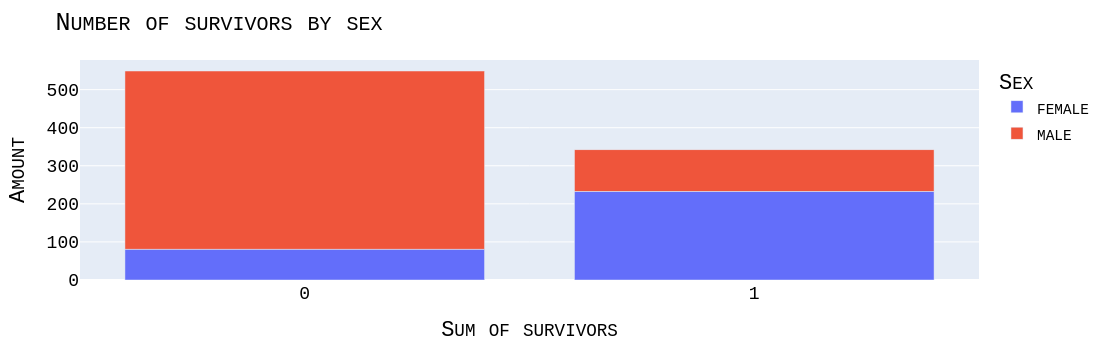

In [14]:
survivors_2 = train.groupby(["Sex", "Survived"]).size().reset_index(name='Amount').sort_values(by="Sex", ascending=True)

fig = px.bar(survivors_2, x='Survived', y='Amount', color='Sex')
fig.update_layout(
    title = {
        'text': f"Number of survivors by sex"
    },
    xaxis_title = "Sum of survivors",
    yaxis_title="Amount",
    font=my_font
)
fig.show()

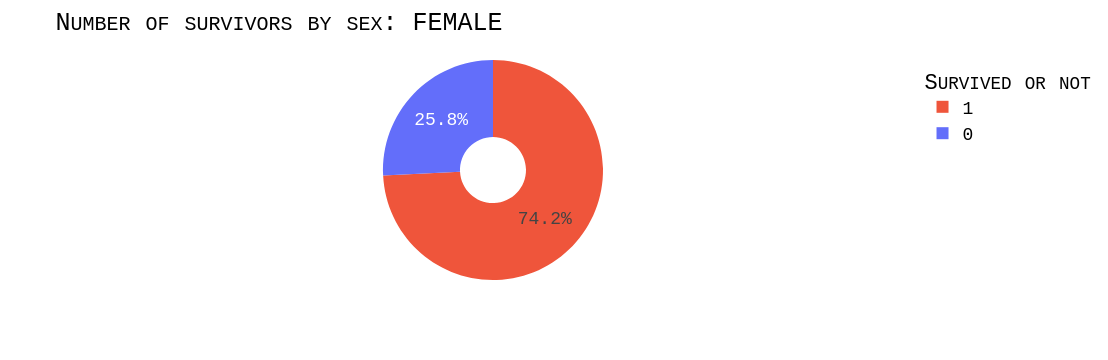

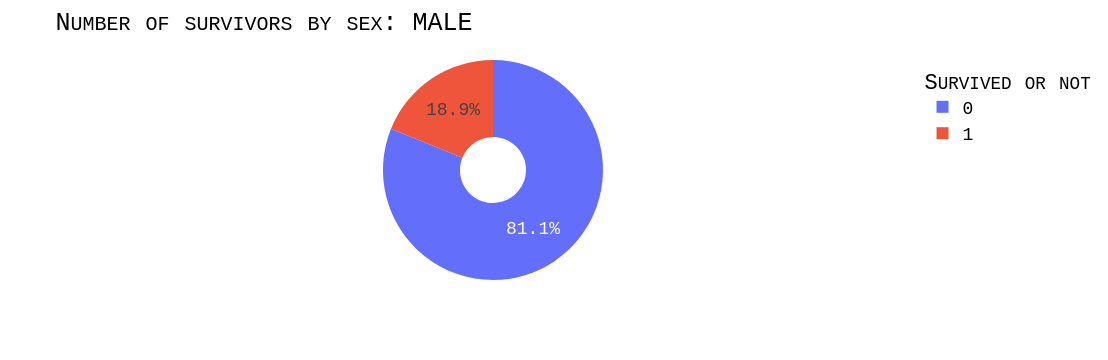

,Sex,Survived,Amount
2,male,0,468
3,male,1,109


In [15]:






sexes = ['female', 'male']

for i in sexes:

    survivors_3 = survivors_2[survivors_2['Sex'] == i]
    
    fig = px.pie(survivors_3, names='Survived', values='Amount', color='Survived', hole = .3)
    fig.update_layout(
        title = {
            'text': f"Number of survivors by sex: {i.upper()}"
        },
        xaxis_title = "Sum of survivors",
        yaxis_title="Amount",
        font=my_font,
        legend_title_text='Survived or not'

    )
    fig.show()

survivors_3

## Analysing classes

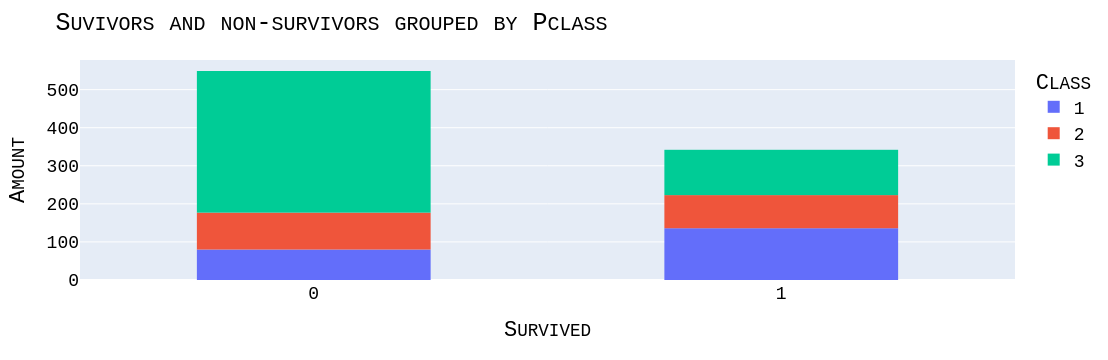

In [16]:
survivors_by_class = train.groupby(['Pclass', 'Sex', 'Survived']).size().reset_index(name='Amount')
fig = px.histogram(
    survivors_by_class,
    x='Survived',
    y='Amount',
    color='Pclass'
)

fig.update_layout(bargap=0.5,
                 title= {
                     'text': f"Suvivors and non-survivors grouped by Pclass"
                 },
                  yaxis_title='Amount',
                  legend_title_text='Class',
                  font=my_font
                 
)

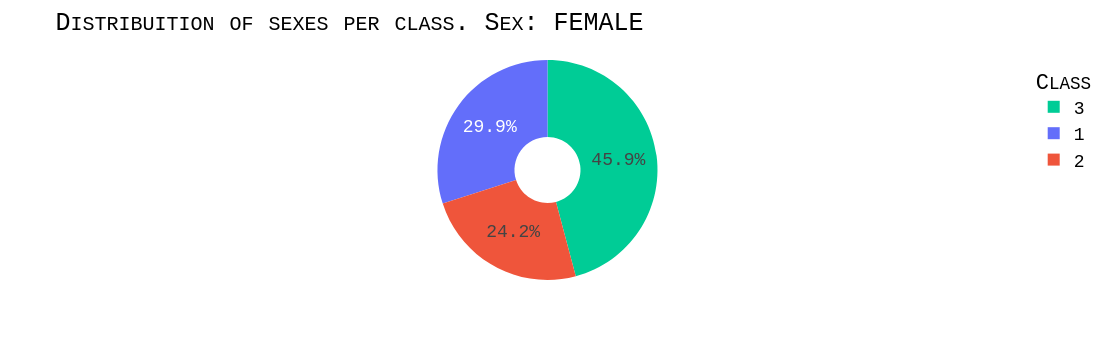

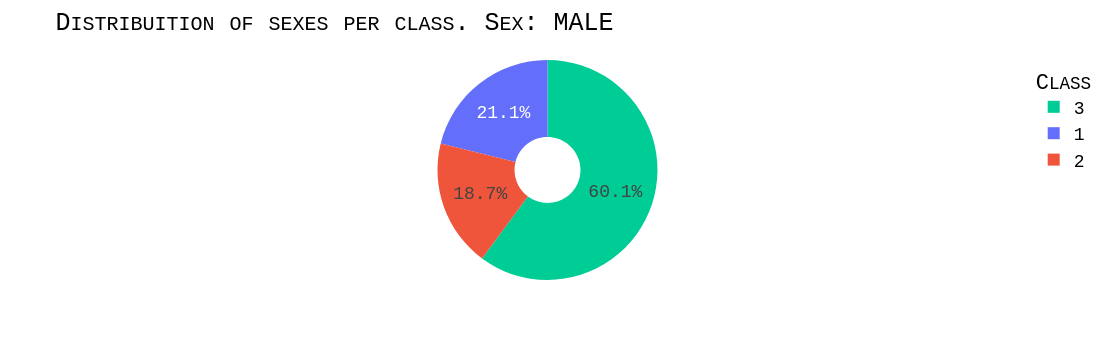

In [17]:
# survivors_by_class = train.groupby(['Pclass', 'Sex', 'Survived']).size().reset_index(name='Amount')

# Group per class to see the amount of males and females by each class

survivors_by_class_2 = survivors_by_class.drop(columns='Survived')

for i in sexes:
    survivors_by_class_3 = survivors_by_class_2[survivors_by_class_2['Sex'] == i]
    fig = px.pie(
        survivors_by_class_3,
        names='Pclass',
        values='Amount',
        color='Pclass',
        hole = .3,
    )
    fig.update_layout(
        title = {
            'text': f'Distribuition of sexes per class. Sex: {i.upper()}'
        },
        legend_title_text='Class',
        font=my_font
    )
    fig.show()


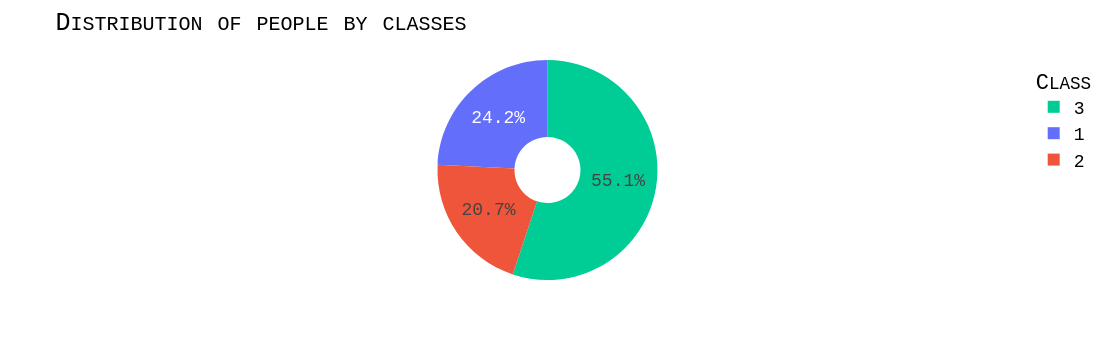

In [18]:

x = survivors_by_class_2.groupby('Pclass').sum('Amount').reset_index()

fig = px.pie(x, names = 'Pclass', values='Amount', color='Pclass', hole = .3,)
fig.update_layout(title={"text": 'Distribution of people by classes'}, font=my_font, legend_title_text='Class')
fig.show()



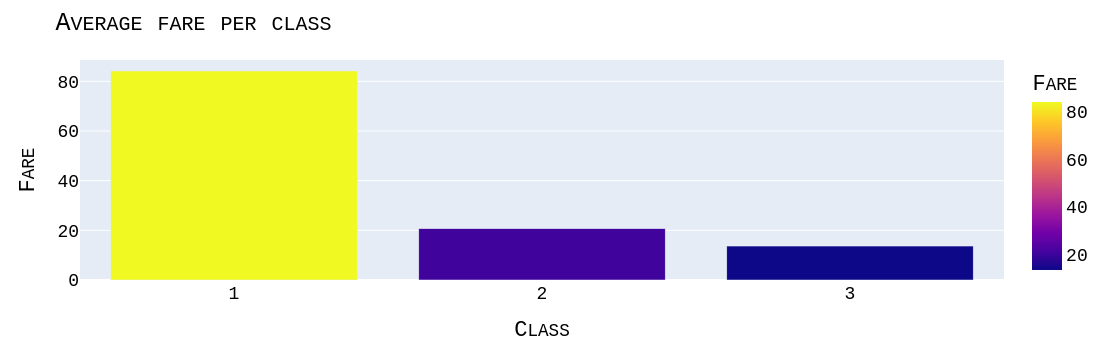

In [19]:
fare_per_class = train.groupby('Pclass').mean('Fare').reset_index()

fig = px.bar(fare_per_class, x='Pclass', y='Fare',color='Fare')
fig.update_layout(title = {'text': 'Average fare per class'}, font = my_font, legend_title_text='Class', xaxis_title='Class')
fig.update_xaxes(type='category')
fig.show()


## Analysing Age

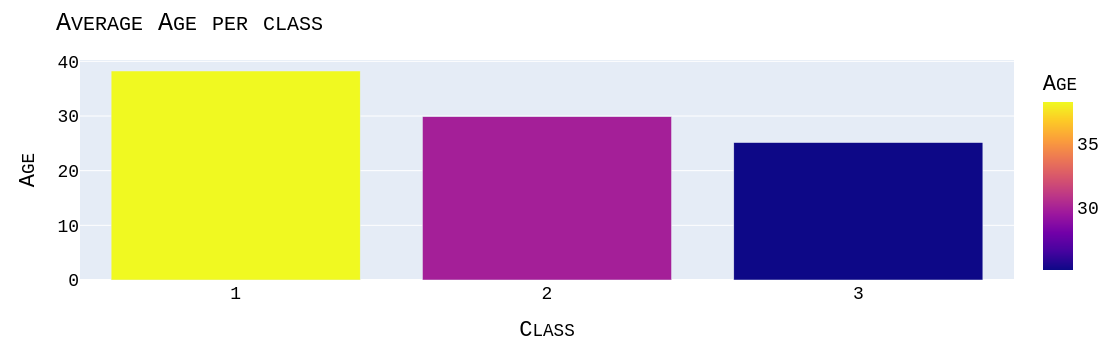

In [20]:
age_per_class = train.groupby('Pclass').mean('Age').reset_index()

fig = px.bar(age_per_class, x='Pclass', y='Age',color='Age')
fig.update_layout(title = {'text': 'Average Age per class'}, font = my_font, legend_title_text='Class', xaxis_title='Class')
fig.update_xaxes(type='category')
fig.show()

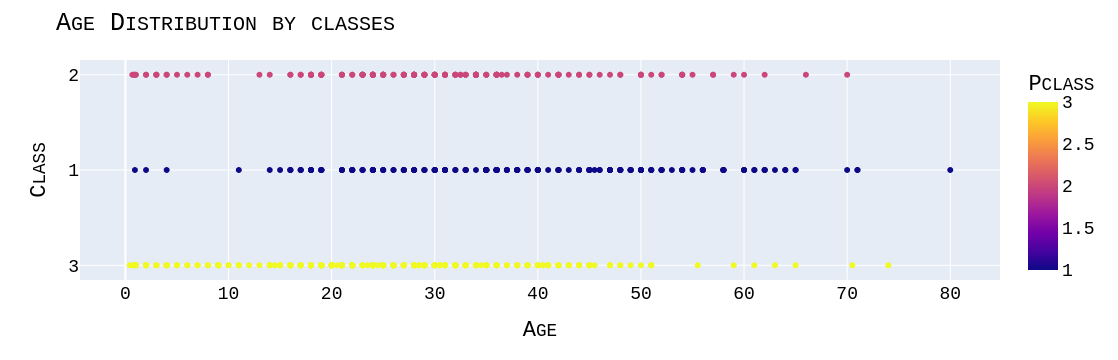

In [21]:
fig = px.scatter(train, x = 'Age', y = 'Pclass', color = 'Pclass')
fig.update_layout(legend_title_text='Class', font = my_font, title={"text": "Age Distribution by classes"}, yaxis_title = 'Class')
fig.update_yaxes(type = 'category')
fig.show()

## Analysing Age of females and males per classes

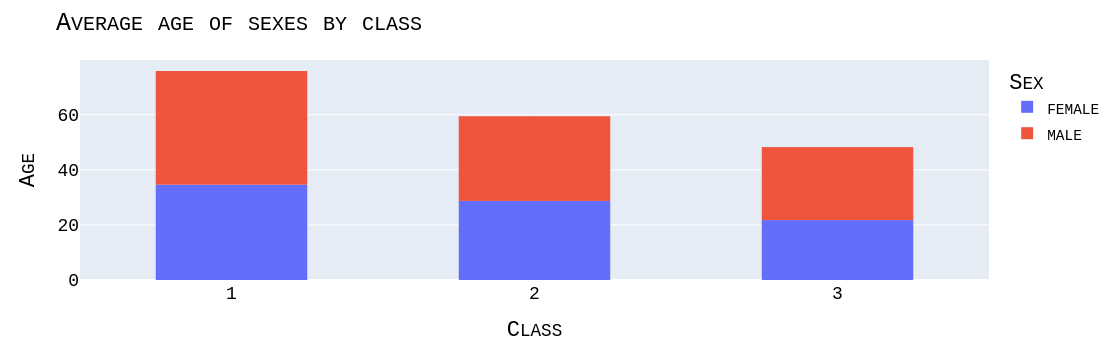

In [22]:
age_per_class_mean = train.groupby(["Sex", "Pclass"]).mean("Age").reset_index()
fig = px.histogram(age_per_class_mean, x = "Pclass", y = "Age", color='Sex')
fig.update_layout(bargap=0.5, title = {"text": "Average age of sexes by class"}, font=my_font, xaxis_title= "Class", yaxis_title='Age')
fig.show()

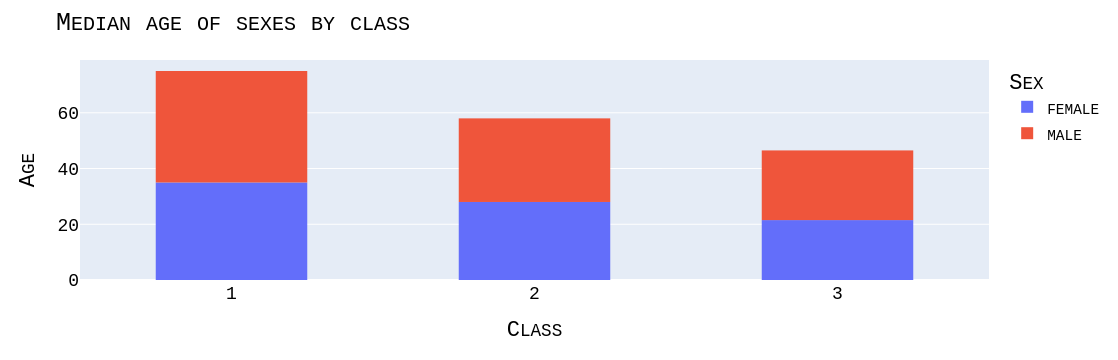

In [23]:
age_per_class_median = train.groupby(["Sex", "Pclass"]).median("Age").reset_index()
fig = px.histogram(age_per_class_median, x = "Pclass", y = "Age", color='Sex')
fig.update_layout(bargap=0.5, title = {"text": "Median age of sexes by class"}, font=my_font, xaxis_title= "Class", yaxis_title='Age')

fig.show()


### Filling age with mediana age by class and dropping cabin column

In [24]:
def age_imputer(dataset):
    Pclass = dataset.iloc[0]
    Sex = dataset.iloc[1]
    Age = dataset.iloc[2]
    if pd.isnull(Age):
        match Sex:
            case "male":
                match Pclass:
                    case 1:
                        return 40
                    case 2:
                        return 30
                    case 3:
                        return 25
            case "female":
                match Pclass:
                    case 1:
                        return 35
                    case 2:
                        return 28
                    case 3:
                        return 21.5
    return Age



train['Age'] = train[['Pclass', 'Sex', 'Age']].apply(age_imputer, axis=1)
train.drop(columns={'Cabin', 'Name'}, inplace=True)


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


## One-hot encoding Sex and Embarked columns

In [26]:
train.dropna(inplace=True)
train.isnull().sum()
train_one_hot_encoded = pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True, dtype=int)


train_one_hot_encoded.tail()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
886,0,2,27.0,0,0,13.00,1,0,1
887,1,1,19.0,0,0,30.00,0,0,1
888,0,3,21.5,1,2,23.45,0,0,1
889,1,1,26.0,0,0,30.00,1,0,0
890,0,3,32.0,0,0,7.75,1,1,0


## Selecting the best features

In [27]:
from sklearn.feature_selection import SelectKBest, f_regression, chi2
X_ = train_one_hot_encoded.drop('Survived',axis=1)
y_ = train_one_hot_encoded['Survived']

selector = SelectKBest(score_func=chi2, k=6)
X_new = selector.fit_transform(X_, y_)
selected_features = selector.get_feature_names_out(input_features=X_.columns)
print(selected_features)

['Pclass' 'Age' 'Parch' 'Fare' 'Sex_male' 'Embarked_S']


## Training the model using Random Forest

In [28]:
X_ = train_one_hot_encoded.drop('Survived', axis=1)
Y_ = train_one_hot_encoded['Survived'] # target


X_train, X_test, Y_train, Y_test = train_test_split(X_, Y_, test_size=0.3, random_state=0, stratify=Y_)
"""
    X_train is the input features
    Y_train is the answers of the training input
    X_test is the sample of these features that are going to be used for evaluating the model
    Y_test is the answers to X_test
"""
scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



print(f"Tamanho do conjunto de treino (X_train): {X_train.shape}")
print(f"Tamanho do conjunto de teste (X_test): {X_test.shape}")

Tamanho do conjunto de treino (X_train): (622, 8)
Tamanho do conjunto de teste (X_test): (267, 8)


In [29]:
"""
    Carregando o modelo    
"""
rforest = RandomForestClassifier()
""" 
    Training the model
"""
rforest.fit(X_train_scaled, Y_train)
"""
    Predictions
"""
predictions = rforest.predict(X_test_scaled)

Random Forest's acurracy: 82.02%

Classification report
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       165
           1       0.76      0.76      0.76       102

    accuracy                           0.82       267
   macro avg       0.81      0.81      0.81       267
weighted avg       0.82      0.82      0.82       267


Confusion Matrix


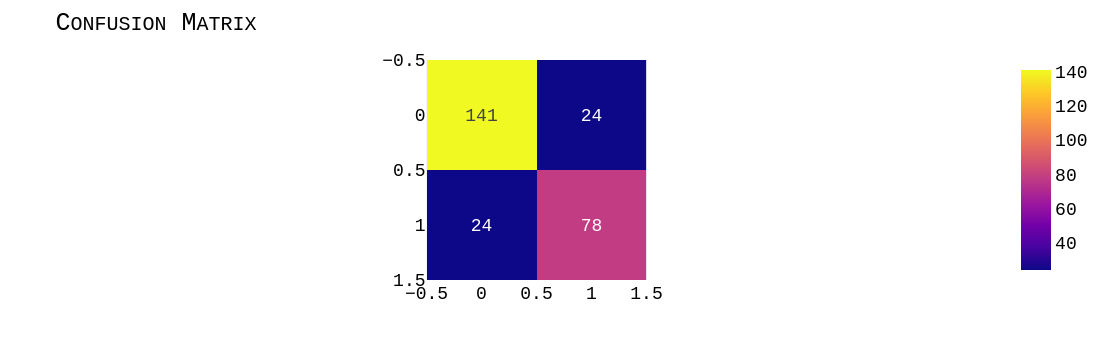

In [30]:
accuracy_rforest = accuracy_score(Y_test, predictions)
print(f"Random Forest's acurracy: {accuracy_rforest*100:.2f}%")

print("\nClassification report")
print(classification_report(Y_test, predictions))



print("\nConfusion Matrix")
cm = confusion_matrix(Y_test, predictions)
fig = px.imshow(cm, text_auto=True).update_layout(title={"text": "Confusion Matrix"}, font=my_font).show()


In [31]:
"""
    Loading the model   
"""
xg = GradientBoostingClassifier(n_estimators=200, learning_rate=0.5, max_depth=3, random_state=30)
""" 
    Training the model
"""
xg.fit(X_train_scaled, Y_train)
"""
    Predictions
"""
xg.score(X_test_scaled, Y_test)

predictions = xg.predict(X_test_scaled)


GradientBoosting's acurracy: 83.52%

Classification report
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       165
           1       0.80      0.76      0.78       102

    accuracy                           0.84       267
   macro avg       0.83      0.82      0.82       267
weighted avg       0.83      0.84      0.83       267


Confusion Matrix


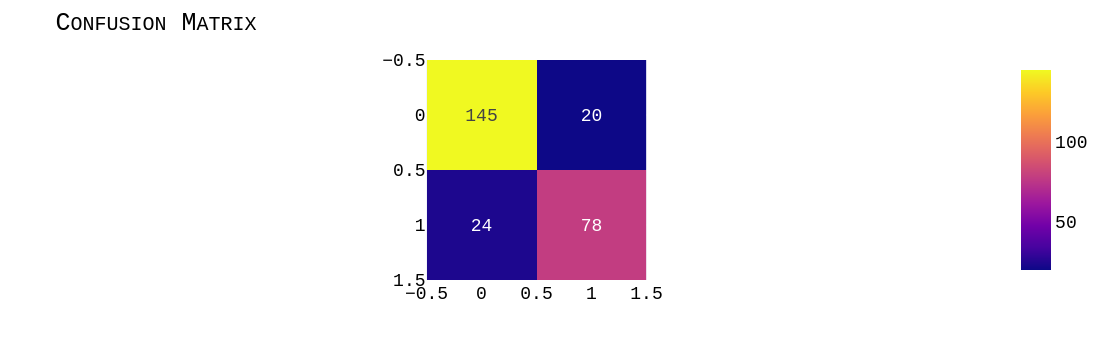

In [32]:
accuracy_xg = accuracy_score(Y_test, predictions)
print(f"GradientBoosting's acurracy: {accuracy_xg*100:.2f}%")

print("\nClassification report")
print(classification_report(Y_test, predictions))

print("\nConfusion Matrix")
cm = confusion_matrix(Y_test, predictions)
fig = px.imshow(cm, text_auto=True).update_layout(title={"text": "Confusion Matrix"}, font=my_font).show()


In [33]:
"""
    Loading the model   
"""
reg = LogisticRegression(max_iter=1000)
""" 
    Training the model
"""
reg.fit(X_train_scaled, Y_train)
"""
    Predictions
"""
reg.score(X_test_scaled, Y_test)

predictions = reg.predict(X_test_scaled)


Logistic regression's acurracy: 82.40%

Classification report
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       165
           1       0.81      0.71      0.75       102

    accuracy                           0.82       267
   macro avg       0.82      0.80      0.81       267
weighted avg       0.82      0.82      0.82       267


Confusion Matrix


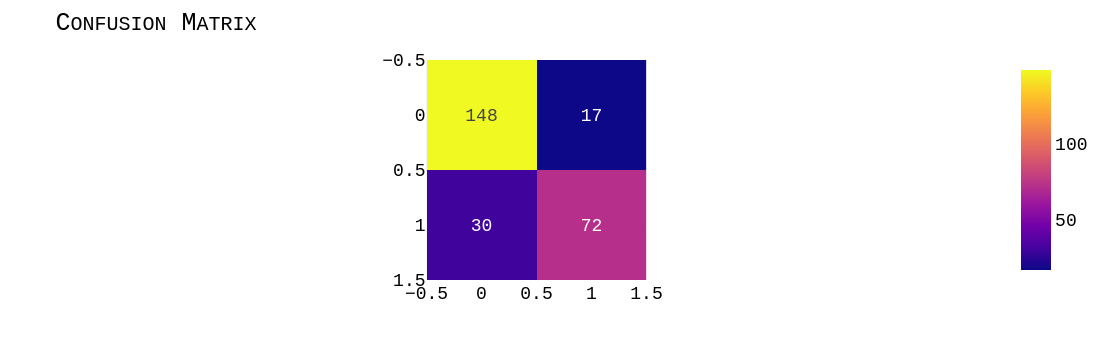

In [34]:
accuracy_reg = accuracy_score(Y_test, predictions)
print(f"Logistic regression's acurracy: {accuracy_reg*100:.2f}%")

print("\nClassification report")
print(classification_report(Y_test, predictions))

print("\nConfusion Matrix")
cm = confusion_matrix(Y_test, predictions)
fig = px.imshow(cm, text_auto=True).update_layout(title={"text": "Confusion Matrix"}, font=my_font).show()


In [35]:
"""
    Loading non-scaled model - the accuracy decreases
"""
rforest = RandomForestClassifier()
""" 
    Training the model
"""
rforest.fit(X_train, Y_train)
"""
    Predictions
"""
predictions = rforest.predict(X_test)

In [36]:
accuracy_rforest = accuracy_score(Y_test, predictions)
print(f"Random Forest's acurracy: {accuracy_rforest*100:.2f}%")

print("\nClassification report")
print(classification_report(Y_test, predictions))



print("\nConfusion Matrix")
cm = confusion_matrix(Y_test, predictions)
fig = px.imshow(cm, text_auto=True).update_layout(title={"text": "Confusion Matrix"}, font=my_font).show()


Random Forest's acurracy: 83.52%

Classification report
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       165
           1       0.80      0.76      0.78       102

    accuracy                           0.84       267
   macro avg       0.83      0.82      0.82       267
weighted avg       0.83      0.84      0.83       267


Confusion Matrix


# Now let us use a more roboust algorithm

In [39]:
xgb = XGBClassifier()
""" 
    Training the model
"""
xgb.fit(X_train, Y_train)
"""
    Predictions
"""
preds = xgb.predict(X_test)

XGBoost's acurracy: 83.52%

Classification report
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       165
           1       0.80      0.76      0.78       102

    accuracy                           0.84       267
   macro avg       0.83      0.82      0.82       267
weighted avg       0.83      0.84      0.83       267


Confusion Matrix


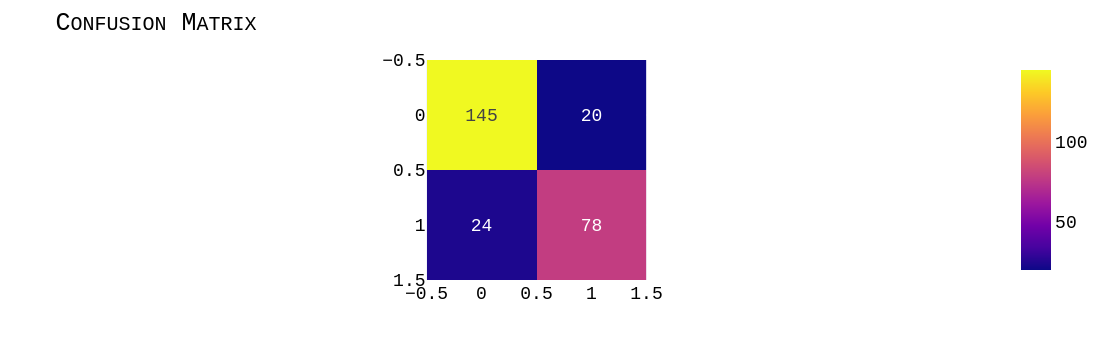

In [40]:
accuracy_xgboost = accuracy_score(Y_test, preds)
print(f"XGBoost's acurracy: {accuracy_xgboost*100:.2f}%")

print("\nClassification report")
print(classification_report(Y_test, predictions))

print("\nConfusion Matrix")
cm = confusion_matrix(Y_test, predictions)
fig = px.imshow(cm, text_auto=True).update_layout(title={"text": "Confusion Matrix"}, font=my_font).show()


In [41]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=100,      
    learning_rate=0.1,   
    depth=6,              
    verbose=0             
)

model.fit(X_train, Y_train)

Catboost's acurracy: 83.52%

Classification report
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       165
           1       0.80      0.76      0.78       102

    accuracy                           0.84       267
   macro avg       0.83      0.82      0.82       267
weighted avg       0.83      0.84      0.83       267


Confusion Matrix


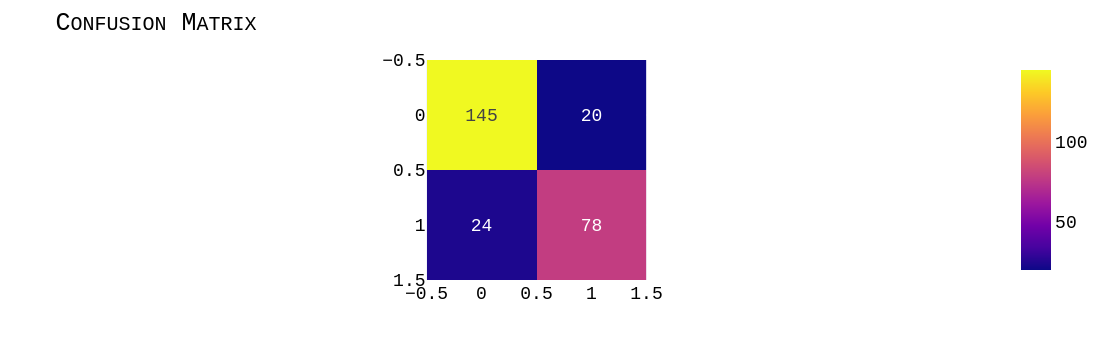

In [42]:
accuracy_catboost = accuracy_score(Y_test, preds)
print(f"Catboost's acurracy: {accuracy_catboost*100:.2f}%")

print("\nClassification report")
print(classification_report(Y_test, predictions))



print("\nConfusion Matrix")
cm = confusion_matrix(Y_test, predictions)
fig = px.imshow(cm, text_auto=True).update_layout(title={"text": "Confusion Matrix"}, font=my_font).show()
